<a href="https://colab.research.google.com/github/Sabrinapearlpervez/Wine-Class-Id-Predictions/blob/main/Wine_Class_Id_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [3]:
path = '/content/wine.data'

In [4]:
df = pd.read_csv(path, header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [5]:
df = df.rename(columns={0: "Class Id", 1:"Alcohol", 2:"Malic Acid", 3:"Ash", 4:"Alcalinity Ash", 5:"Magnesium", 6:"Total Phenols", 
                        7:"Flavanoids", 8:"Non-Flavanoid Phenols", 9:"Proanthocyanins", 10:"Color Intensity", 11:"Hue", 12:"OD280 OD315 DWines", 
                        13:	"Proline"})
df
#renaming columns without names

,Class Id,Alcohol,Malic Acid,Ash,Alcalinity Ash,Magnesium,Total Phenols,Flavanoids,Non-Flavanoid Phenols,Proanthocyanins,Color Intensity,Hue,OD280 OD315 DWines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [6]:
df.duplicated().sum()
#checking for duplicates

0

In [7]:
df.isna().sum()
#checking for missing values

Class Id                 0
Alcohol                  0
Malic Acid               0
Ash                      0
Alcalinity Ash           0
Magnesium                0
Total Phenols            0
Flavanoids               0
Non-Flavanoid Phenols    0
Proanthocyanins          0
Color Intensity          0
Hue                      0
OD280 OD315 DWines       0
Proline                  0
dtype: int64

In [8]:
df.describe()
#summary stats of the dataframe

,Class Id,Alcohol,Malic Acid,Ash,Alcalinity Ash,Magnesium,Total Phenols,Flavanoids,Non-Flavanoid Phenols,Proanthocyanins,Color Intensity,Hue,OD280 OD315 DWines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [9]:
df.info()
#checking for dtypes and non-null count

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Class Id               178 non-null    int64  
 1   Alcohol                178 non-null    float64
 2   Malic Acid             178 non-null    float64
 3   Ash                    178 non-null    float64
 4   Alcalinity Ash         178 non-null    float64
 5   Magnesium              178 non-null    int64  
 6   Total Phenols          178 non-null    float64
 7   Flavanoids             178 non-null    float64
 8   Non-Flavanoid Phenols  178 non-null    float64
 9   Proanthocyanins        178 non-null    float64
 10  Color Intensity        178 non-null    float64
 11  Hue                    178 non-null    float64
 12  OD280 OD315 DWines     178 non-null    float64
 13  Proline                178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [10]:
class_id = df['Class Id'].value_counts()
class_id

2    71
1    59
3    48
Name: Class Id, dtype: int64

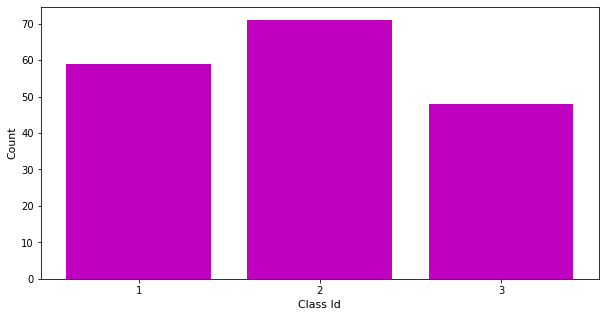

In [11]:
ids = {'1':59, '2':71, '3':48}
keys = list(ids.keys())
values = list(ids.values())

fig = plt.figure(figsize=(10,5));

plt.bar(keys, values, color='m');
plt.xlabel("Class Id", fontsize=11);
plt.ylabel("Count", fontsize=11);
#bar graph of the class ids 

In [12]:
corr = df.corr()
corr

,Class Id,Alcohol,Malic Acid,Ash,Alcalinity Ash,Magnesium,Total Phenols,Flavanoids,Non-Flavanoid Phenols,Proanthocyanins,Color Intensity,Hue,OD280 OD315 DWines,Proline
Class Id,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
Alcohol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic Acid,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity Ash,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Total Phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Non-Flavanoid Phenols,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


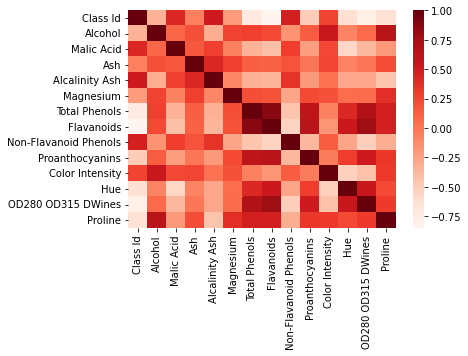

In [13]:
sns.heatmap(corr, cmap='Reds');
#Heatmap of the correlation of all the columns

In [14]:
scaler = StandardScaler()
df_scaler = scaler.fit_transform(df)
#Scaler

Text(0, 0.5, 'inertia')

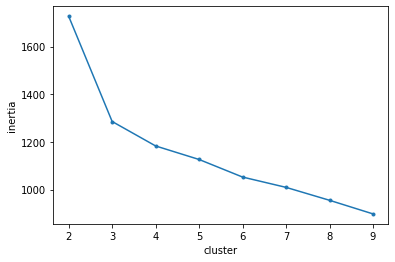

In [22]:
inertia = []
for I in range(2,10):  
    kmeans = KMeans(n_clusters=I)  
    kmeans.fit(df_scaler)  
    inertia.append(kmeans.inertia_)
plt.plot(range(2,10), inertia, marker = '.')
plt.xlabel('cluster')
plt.ylabel('inertia')
#K=3, the elbow of the graph

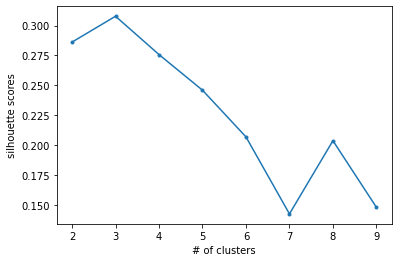

In [26]:
sil_scores = []
for S in range(2, 10):
  kmeansI = KMeans(n_clusters = S)
  kmeansI.fit(df_scaler)
  sil_scores.append(silhouette_score(df_scaler, kmeansI.labels_))
plt.plot(range(2, 10), sil_scores, marker = '.')
plt.xlabel('# of clusters')
plt.ylabel('silhouette scores');
#Silhouette plot

In [27]:
kmeans3 = KMeans(n_clusters = 3)
kmeans3.fit(df_scaler)
silhouette_score(df_scaler, kmeans3.labels_)
#3 seems to be the best score, however it does indicate overlapping clusters

0.30773604383565206

In [15]:
df.describe()
#overview of the dataframe

,Class Id,Alcohol,Malic Acid,Ash,Alcalinity Ash,Magnesium,Total Phenols,Flavanoids,Non-Flavanoid Phenols,Proanthocyanins,Color Intensity,Hue,OD280 OD315 DWines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [16]:
k_clusters = KMeans(n_clusters=3, random_state=42)
k_clusters.fit(df_scaler)
df['cluster'] = k_clusters.labels_
df.head()

,Class Id,Alcohol,Malic Acid,Ash,Alcalinity Ash,Magnesium,Total Phenols,Flavanoids,Non-Flavanoid Phenols,Proanthocyanins,Color Intensity,Hue,OD280 OD315 DWines,Proline,cluster
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [17]:
clust_g = df.groupby('cluster', as_index=False).mean()
clust_g
#putting clusters together

,cluster,Class Id,Alcohol,Malic Acid,Ash,Alcalinity Ash,Magnesium,Total Phenols,Flavanoids,Non-Flavanoid Phenols,Proanthocyanins,Color Intensity,Hue,OD280 OD315 DWines,Proline
0,0,2.000000,12.254118,1.914265,2.239118,20.079412,93.044118,2.248971,2.073382,0.362941,1.601324,3.064706,1.054206,2.788529,506.588235
1,1,1.032787,13.711475,1.997049,2.453770,17.281967,107.786885,2.842131,2.969180,0.289180,1.922951,5.444590,1.067705,3.154754,1110.639344
2,2,2.979592,13.151633,3.344490,2.434694,21.438776,99.020408,1.678163,0.797959,0.450816,1.163061,7.343265,0.685918,1.690204,627.551020


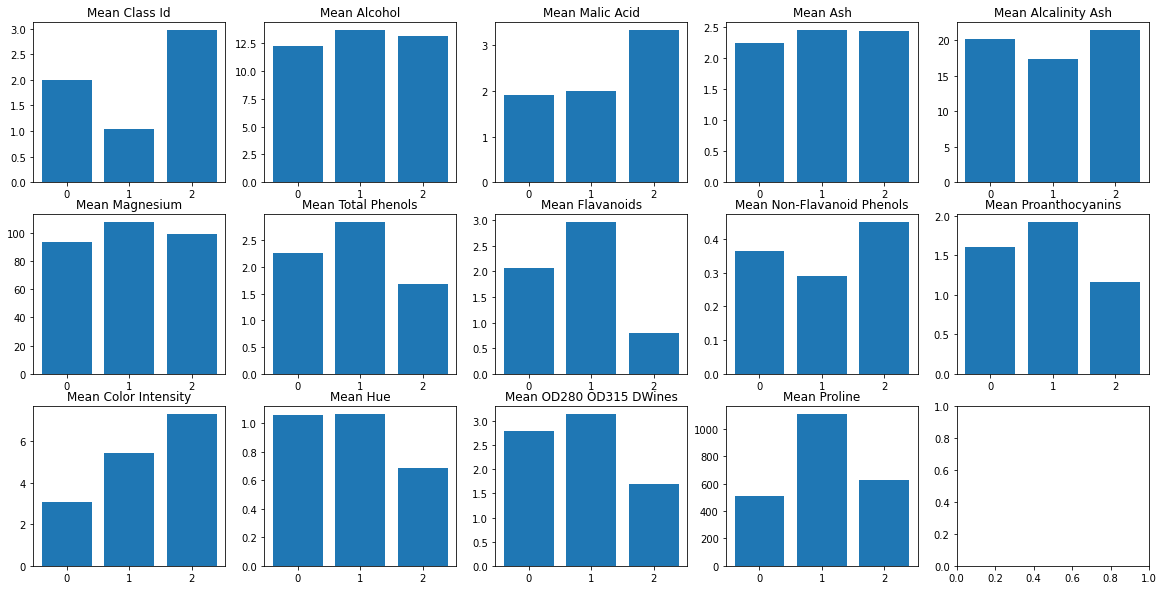

In [18]:
figsize, ax = plt.subplots(3,5, figsize = (20, 10))
ax = ax.ravel()
for w, col in enumerate(clust_g.columns[1:]):
  ax[w].bar(clust_g['cluster'], clust_g[col])
  ax[w].set_title(f'Mean {col}')
#Clusters for each column

###Cluster 0

Class Id, Cluster 0 is the second lowest, yet still similiar to cluster 2. Alcohol, Cluster 0 is the lowest. Malic Acid and Ash, Cluster 0 is the lowest. Alcalinity Ash, Cluster 0 is the second highest. Magnesium, Cluster 0 is the lowest. Total Phenols, Flavanoids, Non-Flavanoid Phenols, and Proanthocyannis, Cluster 0 is the second highest. Color Intensity, Cluster 0 is the lowest. Hue, Cluster 0 is similiar to cluster 1, OD280 OD315 DWines, Cluster 0 is the second highest. Proline, Cluster 0 is the lowest. 

###Cluster 1

Class Id, Cluster 1 is the lowest. Alcohol, Cluster 1 is the highest. Malic Acid, Cluster 1 is the second lowest. Ash, Cluster 1 is the highest. Alcalinity Ash, Cluster 1 is the lowest. Magnesium, Total Phenols ,and Flavanoids, Cluster 1 is the highest. Non Flavanoids, Cluster 1 is the lowest. Proanthocyannis, Cluster 1 is the highest. Color Intensity, Cluster 1 is the second lowest. Hue, Cluster 1 is similiar to Cluster 0. OD280 OD315 DWines and Proline, Cluster 1 is the highest. 

###Cluster 2

Class Id, Cluster 2 is the highest. Alcohol, Cluster 2 is the second highest. Malic Acid, Cluster 2 is the highest. Ash, Cluster 2 is similiar to Cluster 1. Alcalinity Ash, Cluster 2 is the highest. Magnesium, Cluster 2 is the secong highest. Total Phenols and Flavanoids, Cluster 2 is the lowest. Non Flavanoids, Cluster 2 is the highest. Proanthocyannis, Cluster 2 is the lowest. Color Intensity, Cluster 2 is the highest. Hue, Cluster 2 is the lowest. OD280 OD315 DWines, Cluster 2 is the lowest. Proline, Cluster 2 is the second lowest. 

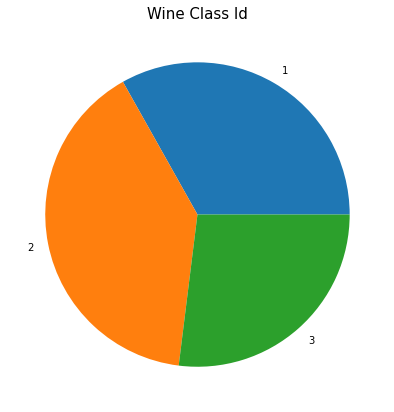

In [42]:
fig = plt.figure(figsize =(10, 7))
plt.pie(values, labels = keys);
plt.title('Wine Class Id', fontsize=15);
#Took the values and keys from the bar graph
#Pie Chart of the Type of Wine

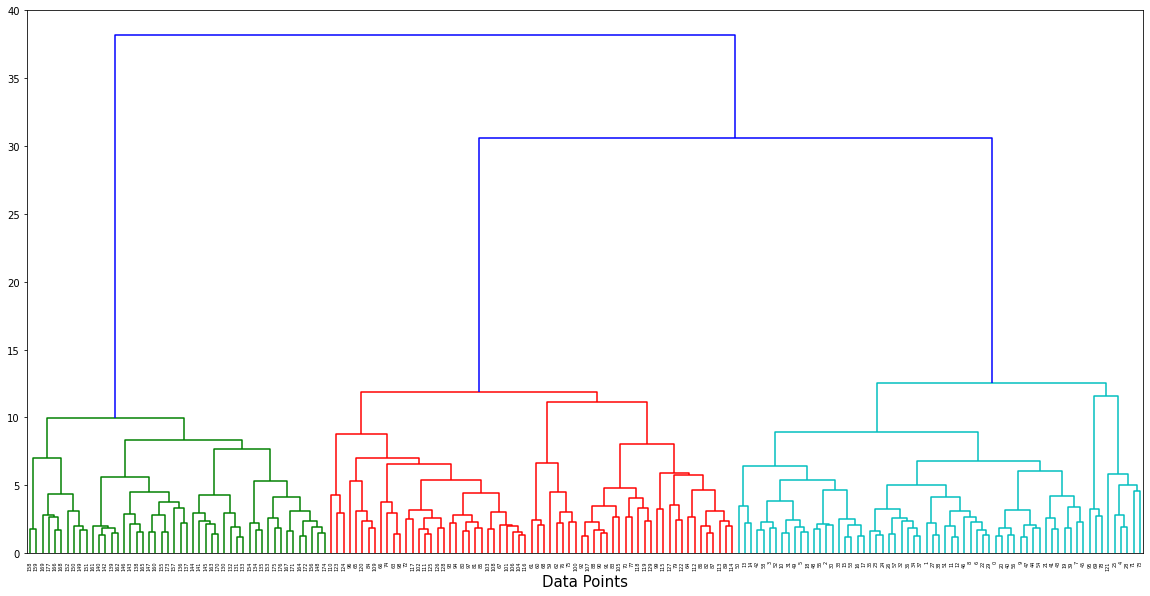

In [37]:
plt.figure(figsize = (20, 10))
sch.dendrogram(sch.linkage(df_scaler, method = 'ward'))
plt.xlabel('Data Points', fontsize=15);
#Cluster 0 has the greatest distance from both the clusters
#the longest lines appear to be 15(an estimate), these clusters have the greatest distance from one another